In [58]:
# Passo 1 importa as bibliotecas necessárias para resolver o exercício
import numpy as np # biblioteca que permite trabalhar com matriz
import pandas as pd # biblioteca que permite criar o dataframe
from sklearn.cluster import KMeans # biblioteca sklearn cluster permite utilizar o
#método de agrupamento kmeans
#from utiliza para importar parte de uma biblioteca e não ela toda
import matplotlib.pyplot as plt # biblioteca que permite a plotagem de figuras 

In [59]:
# Passo 2 Criar um array com os dados
cliente_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #cria um array cliente id
valor_compra = np.array([40.0, 150.0, 500.0, 5000.0, 1834.0, 2350.0, 5000.0, 6740.0, 895.0,
                          3300.0,4750.0]) #cria um array valor compra
dados_compras = np.column_stack((cliente_id, valor_compra)) # np.column stack para empilhar os valores



In [60]:
# Passo 3 criar os clusters
kmeans = KMeans(n_clusters=4) # cria 3 clusters para agrupar os dados
kmeans.fit(dados_compras) # cria o modelo de machine learning para agrupamento dos dados

c:\Users\sn1076220\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [61]:
# Passo 4 avaliar o desempenho do modelo de clusterização
sse = kmeans.inertia_ # métrica para avaliar o desempenho do cluster
print(sse)


1594783.5000000002


In [62]:
# Passo 5 Visualizar os dados da segmentação
labels = kmeans.labels_ # armazenar os rótulos dos dados
centroids = kmeans.cluster_centers_ # armazena o centro dos clusteres

Text(0.5, 1.0, 'Segmentação de clientes com base no valor da compra')

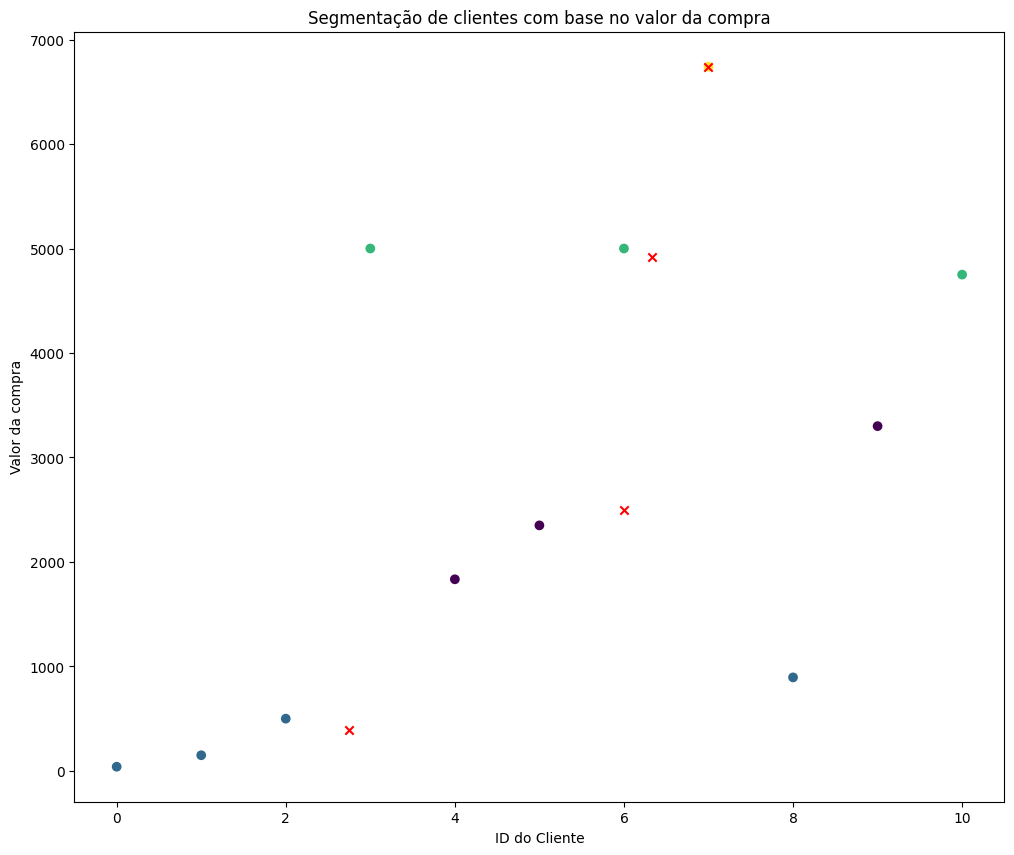

In [63]:
# Passo 6 plotar a visualização dos dados
plt.figure(figsize=(12,10)) # parâmetro para aumentar o tamanho da figura
plt.scatter(dados_compras[:,0],dados_compras[:,1],c =labels) #plota o gráfico de dispersão com os clusters

plt.scatter(centroids[:,0],centroids[:,1],marker='x',color='red') #plota o gráfico com os clusters agrupados
plt.xlabel("ID do Cliente") # Título do eixo x
plt.ylabel("Valor da compra") # Titulo do eixo y
plt.title("Segmentação de clientes com base no valor da compra") # Título do gráfico

In [64]:
dados_compras

array([[0.000e+00, 4.000e+01],
       [1.000e+00, 1.500e+02],
       [2.000e+00, 5.000e+02],
       [3.000e+00, 5.000e+03],
       [4.000e+00, 1.834e+03],
       [5.000e+00, 2.350e+03],
       [6.000e+00, 5.000e+03],
       [7.000e+00, 6.740e+03],
       [8.000e+00, 8.950e+02],
       [9.000e+00, 3.300e+03],
       [1.000e+01, 4.750e+03]])

In [65]:
dados_compras[:,0] # : indica o começo da coluna e 0 indica o final da coluna

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [66]:
dados_compras[:,1] # : indica o começo da coluna e 1 indica o final da coluna

array([  40.,  150.,  500., 5000., 1834., 2350., 5000., 6740.,  895.,
       3300., 4750.])

In [67]:
# Passo 7: Analisar os grupos resultantes
dados_compras_df = pd.DataFrame(dados_compras, columns=['Cliente ID', 'Valor da Compra']) # cria um dataframe
dados_compras_df['Grupo'] = labels # cria uma coluna chamada grupo
grouped_data = dados_compras_df.groupby('Grupo').mean() #agrupa os dados com base na média dos valores
#utilizando a função groupby
print(grouped_data) #print do valor grouped data

       Cliente ID  Valor da Compra
Grupo                             
0        6.000000      2494.666667
1        2.750000       396.250000
2        6.333333      4916.666667
3        7.000000      6740.000000
